This notebook plots the location of all nodules in the database on a random image. This enables me to see the distribution of the nodule locations. Nodules closest to the heart and diaphragm are highlighted on their respective images.  
This information is used to guide the segmentation algorithm since we wish to ensure all nodule containing regions are captured.

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [2]:
nodules = pd.read_csv('../Raw Data/JSRT_Clinical_Information/CLNDAT_EN.csv', index_col = 'Image Index')
nodules.head()

,Subtlety,Nodule Size,Age,Sex,X Pos,Y Pos,Nodule Type,Anatomical Location,Diagnosis
Image Index,,,,,,,,,
JPCLN001.npy,5,15,53,male,1634,692,malignant,l.upper lobe,lung cancernan
JPCLN002.npy,5,30,78,female,1614,1090,benign,l.upper lobe(S5),pulmonary hematoma
JPCLN003.npy,5,30,63,female,1303,447,malignant,l.upper lobe(S1+2),lung cancernan
JPCLN004.npy,5,14,68,female,606,836,benign,r.upper lobe,inflammatorymass
JPCLN005.npy,5,35,73,female,1438,692,malignant,l.upper lobe(S3),lung cancernan


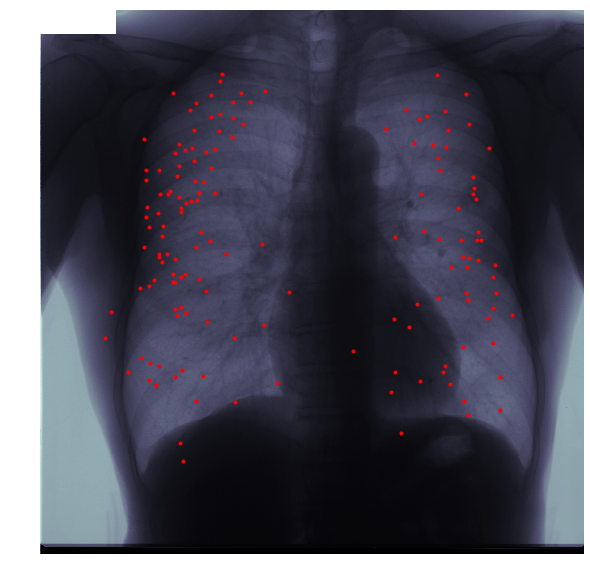

In [3]:
# Plotting all nodules on a single image
img = np.load('../Raw Data/All247Images/All247Images/'+nodules.index[0])
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(img, cmap = 'bone')
ax.plot(nodules['X Pos'], nodules['Y Pos'], marker = '.', color = 'r', linestyle = 'None')
ax.axis('off')
fig.savefig('../Outputs/JSRT Outputs/all_nodule_locations.png', bbox_inches = 'tight')

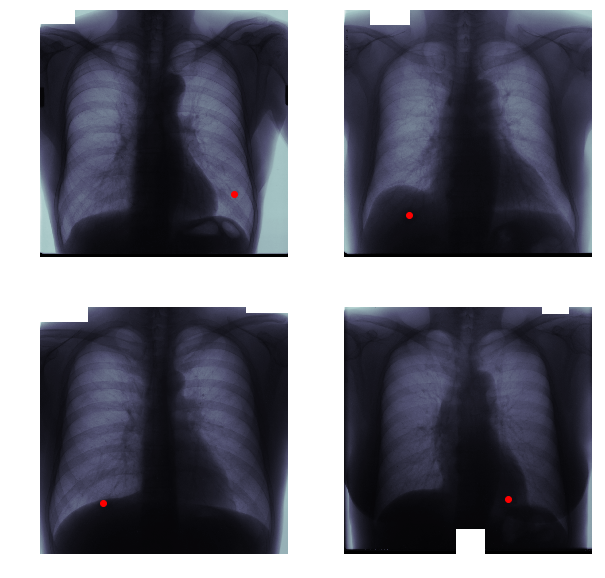

In [4]:
# Plotting nodules that are closest to the lower edge of the images to see if they occupy the diaphragm region.
fig, ax = plt.subplots(2,2,figsize = (10,10))

name_list = nodules.loc[nodules['Y Pos'] > 1510].index
    
img1 = np.load('../Raw Data/All247Images/All247Images/' + name_list[0])
img2 = np.load('../Raw Data/All247Images/All247Images/' + name_list[1])
img3 = np.load('../Raw Data/All247Images/All247Images/' + name_list[2])
img4 = np.load('../Raw Data/All247Images/All247Images/' + name_list[3])

ax[0,0].imshow(img1, cmap = 'bone')
ax[0,0].plot(nodules.loc[name_list[0], 'X Pos'],
             nodules.loc[name_list[0], 'Y Pos'], marker = 'o', color = 'r')
ax[0,0].axis('off')

ax[0,1].imshow(img2, cmap = 'bone')
ax[0,1].plot(nodules.loc[name_list[1], 'X Pos'],
             nodules.loc[name_list[1], 'Y Pos'], marker = 'o', color = 'r')
ax[0,1].axis('off')

ax[1,0].imshow(img3, cmap = 'bone')
ax[1,0].plot(nodules.loc[name_list[2], 'X Pos'],
             nodules.loc[name_list[2], 'Y Pos'], marker = 'o', color = 'r')
ax[1,0].axis('off')

ax[1,1].imshow(img4, cmap = 'bone')
ax[1,1].plot(nodules.loc[name_list[3], 'X Pos'],
             nodules.loc[name_list[3], 'Y Pos'], marker = 'o', color = 'r')
ax[1,1].axis('off')
fig.savefig('../Outputs/JSRT Outputs/nodules_in_diaphragm.png', bbox_inches = 'tight')

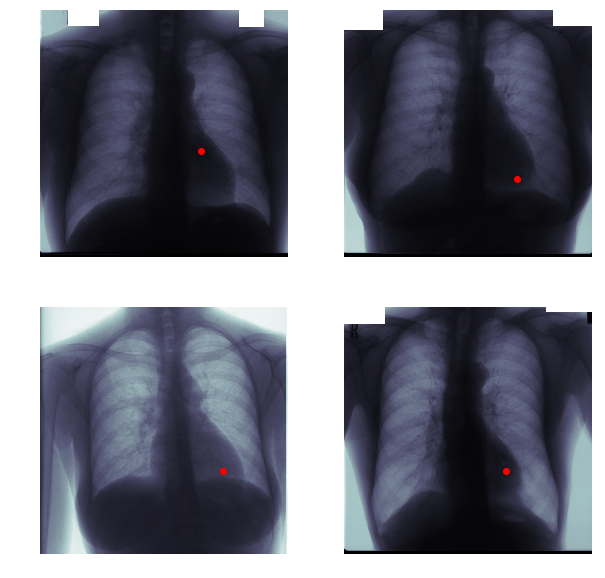

In [5]:
# Plotting nodules that are near the centre of the image to see if they occupy the heart region.

fig, ax = plt.subplots(2,2,figsize = (10,10))

name_list = nodules.loc[(nodules['Y Pos'] > 1100) & (nodules['X Pos'] > 1000)
                        & (nodules['X Pos'] < 1550)].sample(4, random_state = 1002).index

img1 = np.load('../Raw Data/All247Images/All247Images/' + name_list[0])
img2 = np.load('../Raw Data/All247Images/All247Images/' + name_list[1])
img3 = np.load('../Raw Data/All247Images/All247Images/' + name_list[2])
img4 = np.load('../Raw Data/All247Images/All247Images/' + name_list[3])

ax[0,0].imshow(img1, cmap = 'bone')
ax[0,0].plot(nodules.loc[name_list[0], 'X Pos'],
             nodules.loc[name_list[0], 'Y Pos'], marker = 'o', color = 'r')
ax[0,0].axis('off')

ax[0,1].imshow(img2, cmap = 'bone')
ax[0,1].plot(nodules.loc[name_list[1], 'X Pos'],
             nodules.loc[name_list[1], 'Y Pos'], marker = 'o', color = 'r')
ax[0,1].axis('off')

ax[1,0].imshow(img3, cmap = 'bone')
ax[1,0].plot(nodules.loc[name_list[2], 'X Pos'],
             nodules.loc[name_list[2], 'Y Pos'], marker = 'o', color = 'r')
ax[1,0].axis('off')

ax[1,1].imshow(img4, cmap = 'bone')
ax[1,1].plot(nodules.loc[name_list[3], 'X Pos'],
             nodules.loc[name_list[3], 'Y Pos'], marker = 'o', color = 'r')
ax[1,1].axis('off')
fig.savefig('../Outputs/JSRT Outputs/nodules_in_heart.png', bbox_inches = 'tight')